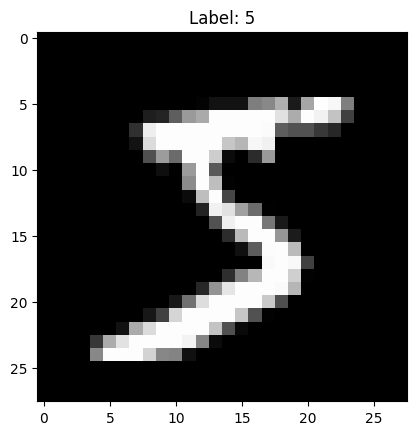

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8944 - loss: 0.3568
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9715 - loss: 0.0909
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9822 - loss: 0.0555
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9862 - loss: 0.0410
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0291
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0992

Test accuracy: 0.9793999791145325
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


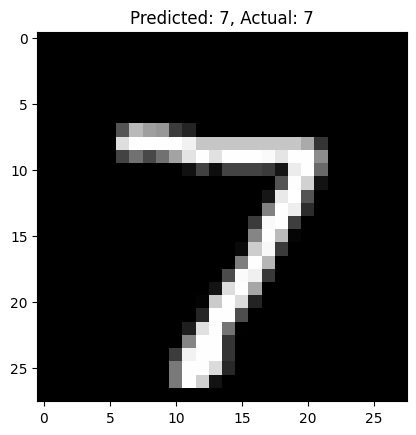

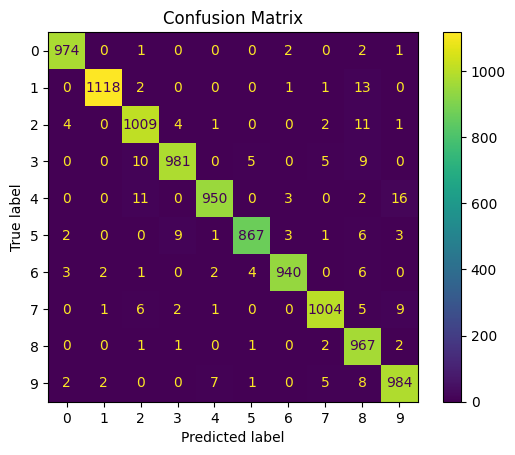

Visualizing predictions for first 5 test images:


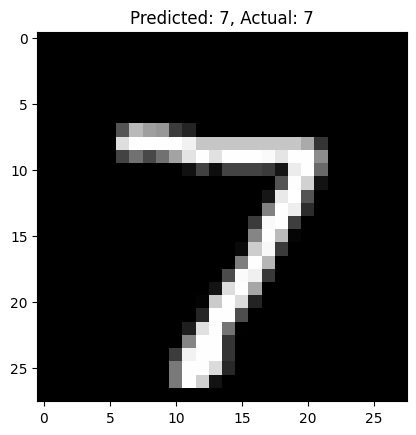

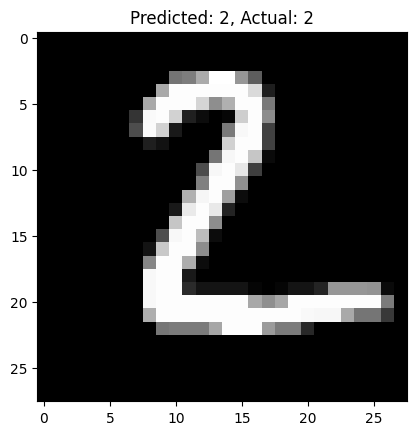

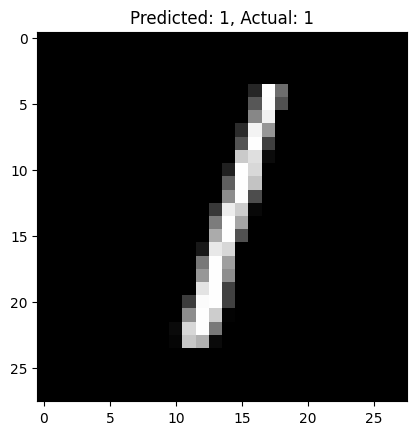

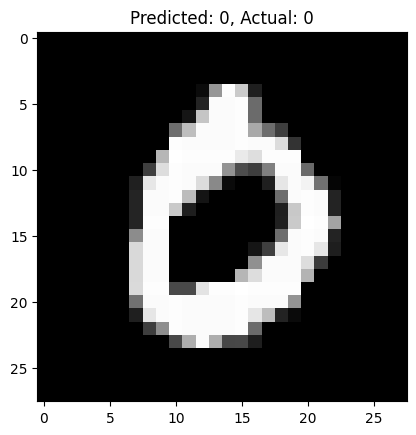

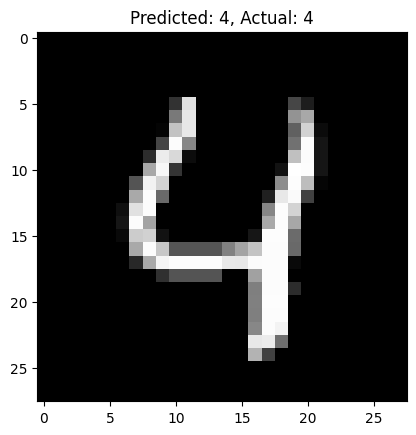

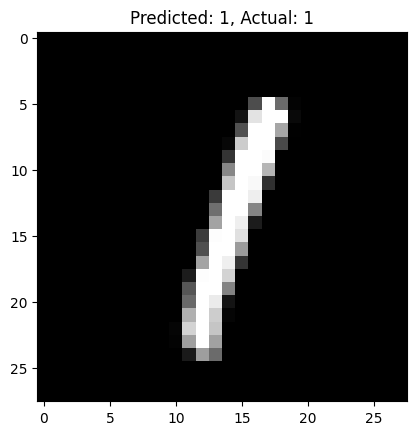

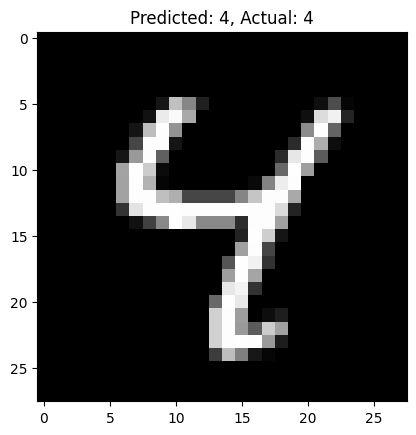

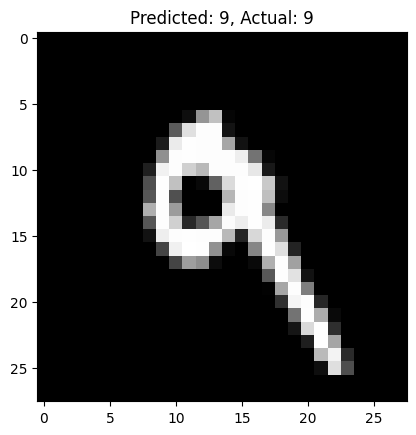

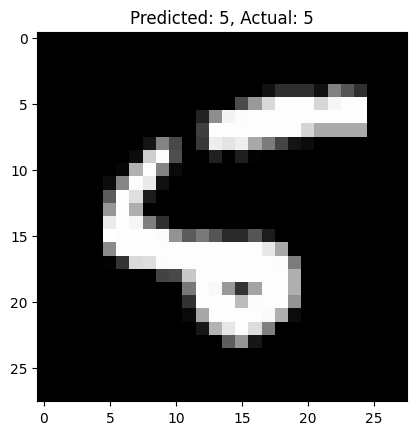

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scaling pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize one sample data point
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(256, activation='relu'),  # Hidden layer with 256 neurons
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 digits (0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training the model...")
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Predict on test data
predictions = model.predict(x_test)

# Visualize predictions for the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicted: {predictions[0].argmax()}, Actual: {y_test[0]}')
plt.show()

# Generate and display the confusion matrix
# -----------------------------------------
# Convert predictions to class labels
y_pred = predictions.argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()
# -----------------------------------------

# Visualize predictions for the first 5 test images
print("Visualizing predictions for first 5 test images:")
for i in range(9):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}')
    plt.show()
